In [1]:
import sys

In [2]:
sys.version


'3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]'

In [4]:
pip install opencv-python


The following command must be run outside of the IPython shell:

    $ pip install opencv-python

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [1]:
import cv2

In [3]:
import glob

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import random


In [6]:
from skimage.feature import hog

In [11]:
#reading image paths with glob
vehicle_image_arr = glob.glob('E:\\Udacity-CarND-Vehicle-Detection-and-Tracking-master\\vehicles\\KITTI_extracted\\*')
len(vehicle_image_arr)
#print(vehicle_image_arr[0])

6942

In [12]:
# read images and append to list
vehicle_images_original=[]
for imagePath in vehicle_image_arr:
    readImage=cv2.imread(imagePath)
    rgbImage = cv2.cvtColor(readImage, cv2.COLOR_BGR2RGB)
    vehicle_images_original.append(rgbImage)

In [13]:
print('Reading of Vehicle Images Done')

Reading of Vehicle Images Done


In [14]:
non_vehicle_image_arr = glob.glob('E:\\Udacity-CarND-Vehicle-Detection-and-Tracking-master\\non-vehicles\\GTI\\*')
len(non_vehicle_image_arr)

8968

In [15]:
non_vehicle_images_original=[]
for imagePath in non_vehicle_image_arr:
    readImage=cv2.imread(imagePath)
    rgbImage = cv2.cvtColor(readImage, cv2.COLOR_BGR2RGB)
    non_vehicle_images_original.append(rgbImage)

In [16]:
print("Reading of Non Vehicle Images Done")

print("No of Vehicle Images Loaded -"+ str(len(vehicle_image_arr)))
print("No of Non-Vehicle Images Loaded -"+ str(len(non_vehicle_images_original)))

Reading of Non Vehicle Images Done
No of Vehicle Images Loaded -6942
No of Non-Vehicle Images Loaded -8968


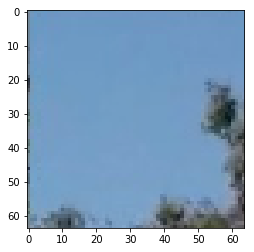

In [17]:
plt.imshow(vehicle_images_original[0])
plt.imshow(non_vehicle_images_original[0])


Shape of Vehicle Image(64, 64, 3)
Shape of Non Vehicle Image(64, 64, 3)


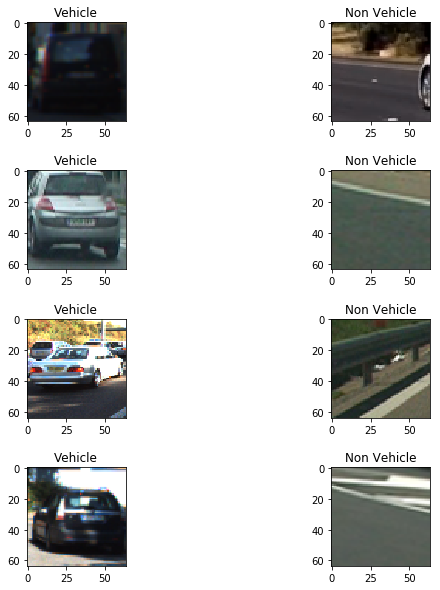

In [18]:
f, axes = plt.subplots(4,2, figsize=(10,10))
plt.subplots_adjust(hspace=0.5)

for index in range(4):
    vehicle=random.randint(0, len(vehicle_images_original)-1)
    non_vehicle=random.randint(0, len(non_vehicle_images_original)-1)
    axes[index,0].imshow(vehicle_images_original[vehicle])
    axes[index,0].set_title("Vehicle")
    axes[index,1].imshow(non_vehicle_images_original[non_vehicle])
    axes[index,1].set_title("Non Vehicle")
    
    
print("Shape of Vehicle Image" +  str(vehicle_images_original[vehicle].shape))
print("Shape of Non Vehicle Image" +  str(non_vehicle_images_original[non_vehicle].shape))

In [20]:
### Extract Color Space

#creating a Histogram
def ExtractColorHistogram(image, nbins=32, bins_range=(0,255), resize=None):
    if(resize !=None):
        image= cv2.resize(image, resize)
    zero_channel= np.histogram(image[:,:,0], bins=nbins, range=bins_range)
    first_channel= np.histogram(image[:,:,1], bins=nbins, range=bins_range)
    second_channel= np.histogram(image[:,:,2], bins=nbins, range=bins_range)
    return zero_channel,first_channel, second_channel

#Find Center of the bin edges
def FindBinCenter(histogram_channel):
    bin_edges = histogram_channel[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    return bin_centers

#Extracting Color Features from bin lengths
def ExtractColorFeatures(zero_channel, first_channel, second_channel):
    return np.concatenate((zero_channel[0], first_channel[0], second_channel[0]))

No of features are 384


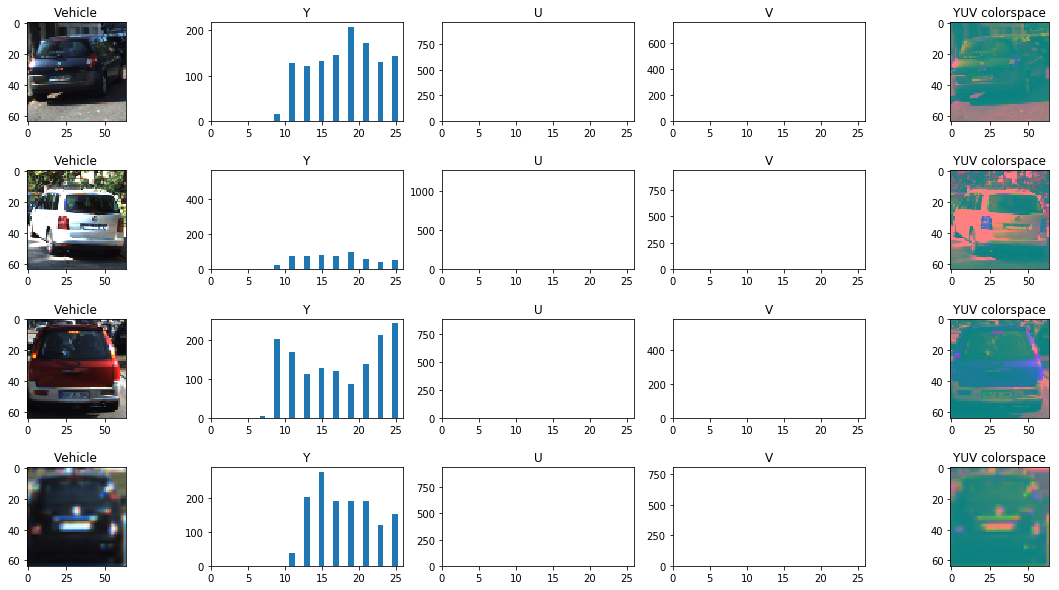

In [21]:
# Checking Color Features for Vehicles

f, axes= plt.subplots(4,5, figsize=(20,10))
f.subplots_adjust(hspace=0.5)

for index in range(4):
    
    vehicle=random.randint(0, len(vehicle_images_original)-1)
    non_vehicle=random.randint(0, len(non_vehicle_images_original)-1)
    
    coloredImage= cv2.cvtColor(vehicle_images_original[vehicle],cv2.COLOR_RGB2YUV)
    r,g,b = ExtractColorHistogram(coloredImage,128)
   
    center= FindBinCenter(r)
    axes[index,0].imshow(vehicle_images_original[vehicle])
    axes[index,0].set_title("Vehicle")
    axes[index,1].set_xlim(0,26)
    axes[index,1].bar(center,r[0])
    axes[index,1].set_title("Y")
    axes[index,2].set_xlim(0,26)
    axes[index,2].bar(center,g[0])
    axes[index,2].set_title("U")
    axes[index,3].set_xlim(0,26)
    axes[index,3].bar(center,b[0])
    axes[index,3].set_title("V")
    axes[index,4].imshow(coloredImage)
    axes[index,4].set_title("YUV colorspace")
    
features = ExtractColorFeatures(r,g,b)
print("No of features are "+ str(len(features)))

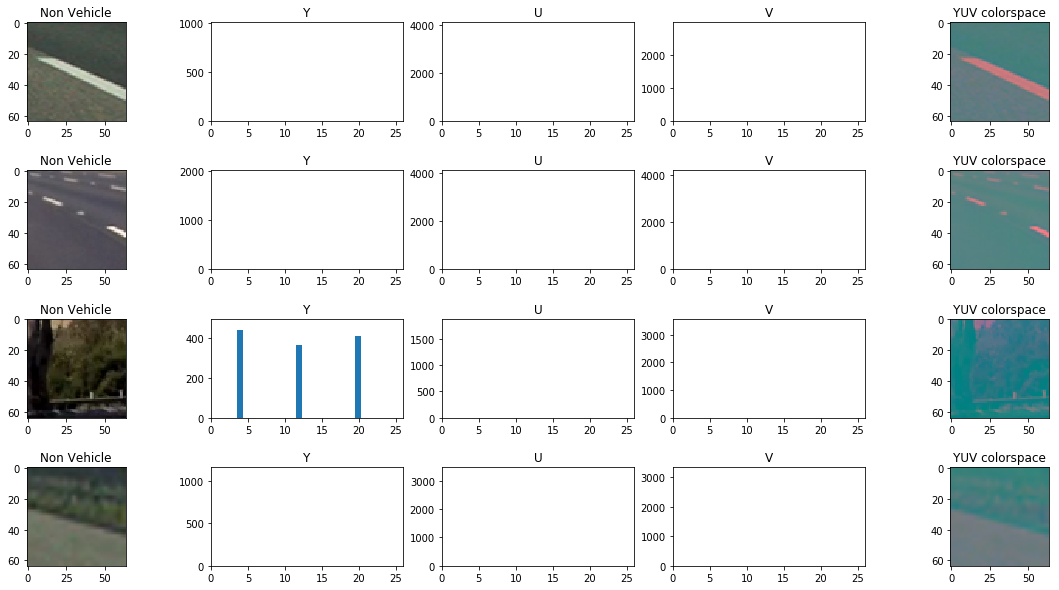

In [22]:
# Checking Color Features for Non Vehicles

f, axes= plt.subplots(4,5, figsize=(20,10))
f.subplots_adjust(hspace=0.5)

for index in range(4):
    non_vehicle=random.randint(0, len(non_vehicle_images_original)-1)
    coloredImage= cv2.cvtColor(non_vehicle_images_original[non_vehicle],cv2.COLOR_RGB2YUV)
    r,g,b = ExtractColorHistogram(coloredImage)
    
    center= FindBinCenter(r)
    axes[index,0].imshow(non_vehicle_images_original[non_vehicle])
    axes[index,0].set_title("Non Vehicle")
    axes[index,1].set_xlim(0,26)
    axes[index,1].bar(center,r[0])
    axes[index,1].set_title("Y")
    axes[index,2].set_xlim(0,26)
    axes[index,2].bar(center,g[0])
    axes[index,2].set_title("U")
    axes[index,3].set_xlim(0,26)
    axes[index,3].bar(center,b[0])
    axes[index,3].set_title("V")
    axes[index,4].imshow(coloredImage)
    axes[index,4].set_title("YUV colorspace")

In [23]:
#Resizing Image to extract features, so as to reduce the feature vector size
def SpatialBinningFeatures(image,size):
    image= cv2.resize(image,size)
    return image.ravel()

In [24]:
#testing the spatial binning

featureList=SpatialBinningFeatures(vehicle_images_original[1],(16,16))
print("No of features before spatial binning",len(vehicle_images_original[1].ravel()))
print("No of features after spatial binning",len(featureList))


No of features before spatial binning 12288
No of features after spatial binning 768


In [25]:
# General method to extact the HOG of the image

def GetFeaturesFromHog(image,orient,cellsPerBlock,pixelsPerCell, visualise= False, feature_vector_flag=True):
    if(visualise==True):
        hog_features, hog_image = hog(image, orientations=orient,
                          pixels_per_cell=(pixelsPerCell, pixelsPerCell), 
                          cells_per_block=(cellsPerBlock, cellsPerBlock), 
                          visualise=True, feature_vector=feature_vector_flag)
        return hog_features, hog_image
    else:
        hog_features = hog(image, orientations=orient,
                          pixels_per_cell=(pixelsPerCell, pixelsPerCell), 
                          cells_per_block=(cellsPerBlock, cellsPerBlock), 
                          visualise=False, feature_vector=feature_vector_flag)
        return hog_features

C:\Users\user\Anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
C:\Users\user\Anaconda3\lib\site-packages\skimage\feature\_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


Feature Vector Length Returned is  324
No of features that can be extracted from image  4096


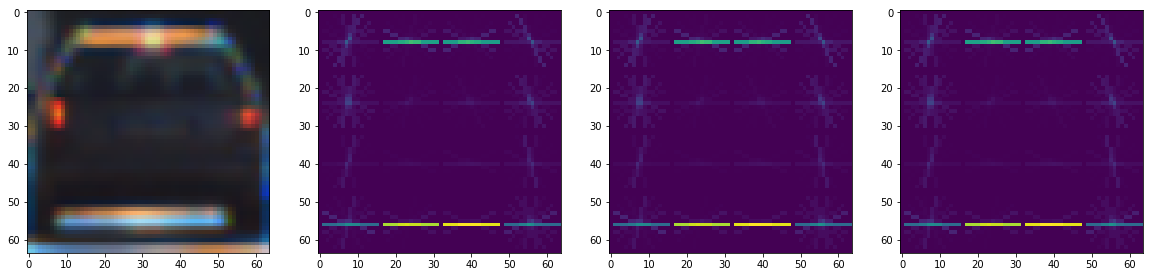

In [26]:
#testing HOG on test images

image=vehicle_images_original[1]
image= cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
image_channel_0=image[:,:,0]
image_channel_1=image[:,:,0]
image_channel_2=image[:,:,0]

feature_0,hog_img_0=GetFeaturesFromHog(image_channel_0,9,2,16,visualise=True,feature_vector_flag=True)
feature_1,hog_img_1=GetFeaturesFromHog(image_channel_1,9,2,16,visualise=True,feature_vector_flag=True)
feature_2,hog_img_2=GetFeaturesFromHog(image_channel_2,9,2,16,visualise=True,feature_vector_flag=True)

f, axes= plt.subplots(1,4,figsize=(20,10))
axes[0].imshow(vehicle_images_original[1])
axes[1].imshow(hog_img_0)
axes[2].imshow(hog_img_1)
axes[3].imshow(hog_img_2)


print("Feature Vector Length Returned is ",len(feature_0))
print("No of features that can be extracted from image ",len(hog_img_0.ravel()))


In [27]:
#Convert Image Color Space. Note the colorspace parameter is like cv2.COLOR_RGB2YUV
def ConvertImageColorspace(image, colorspace):
    return cv2.cvtColor(image, colorspace)

In [28]:
# Method to extract the features based on the choices as available in step 2

def ExtractFeatures(images,orientation,cellsPerBlock,pixelsPerCell, convertColorspace=False):
    featureList=[]
    imageList=[]
    for image in images:
        if(convertColorspace==True):
            image= cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        local_features_1=GetFeaturesFromHog(image[:,:,0],orientation,cellsPerBlock,pixelsPerCell, False, True)
        local_features_2=GetFeaturesFromHog(image[:,:,1],orientation,cellsPerBlock,pixelsPerCell, False, True)
        local_features_3=GetFeaturesFromHog(image[:,:,2],orientation,cellsPerBlock,pixelsPerCell, False, True)
        x=np.hstack((local_features_1,local_features_2,local_features_3))
        featureList.append(x)
    return featureList

In [29]:
%%time

orientations=9
cellsPerBlock=2
pixelsPerBlock=16
convertColorSpace=True
vehicleFeatures= ExtractFeatures(vehicle_images_original,orientations,cellsPerBlock,pixelsPerBlock, convertColorSpace)
nonVehicleFeatures= ExtractFeatures(non_vehicle_images_original,orientations,cellsPerBlock,pixelsPerBlock, convertColorSpace)

Wall time: 1min 5s


In [30]:
featuresList= np.vstack([vehicleFeatures, nonVehicleFeatures])
print("Shape of features list is ", featuresList.shape)
labelList= np.concatenate([np.ones(len(vehicleFeatures)), np.zeros(len(nonVehicleFeatures))])
print("Shape of label list is ", labelList.shape)

Shape of features list is  (15910, 972)
Shape of label list is  (15910,)


In [31]:
# train test split of data

from sklearn.model_selection import train_test_split

X_train,  X_test,Y_train, Y_test = train_test_split(featuresList, labelList, test_size=0.2, shuffle=True)

In [32]:
# normalization and scaling

from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [33]:
%%time

# Train a Linear SVM classifer
from sklearn.svm import LinearSVC
classifier1= LinearSVC()
classifier1.fit(X_train,Y_train)
print("Accuracy of SVC is  ", classifier1.score(X_test,Y_test) )

Accuracy of SVC is   0.992771841609051
Wall time: 3.53 s
